In [1]:
import pandas as pd
import sklearn as scikit
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Initialize data to be from the excel sheet
file_name = "default of credit card clients.xls"
raw_data = pd.read_excel(file_name)

In [3]:
print(raw_data)

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

NOTE: Our original data has the labels underneath arbitrary x1,x2,...xn labels. We will omit fix the formate of the dataframe first to have the proper labels in the dataframe.

In [4]:
# Format of data frame is configured incorrectly. We will fix format here...
# Fixing the dataframes labels...
raw_data.columns = raw_data.iloc[0]
# Removing labels from being within the dataframe...
raw_data = raw_data.iloc[1:,:]
#Removing first column ID from within the dataframe as not relevent to our models
raw_data = raw_data.iloc[:,1:]


raw_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Now with our data initialized, lets take a moment to explore the distribution of our classes

In [5]:
# Define a function to plot the distribution of a column
def plot_distribution(df, column):
    # Get the number of unique values in the column
    num_unique_values = df[column].nunique()
    df[column].hist(bins=num_unique_values, figsize=(10,5))
    plt.xlabel(column)
    plt.ylabel('Number of people')
    plt.title(f'Distribution of {column}')
    plt.show()

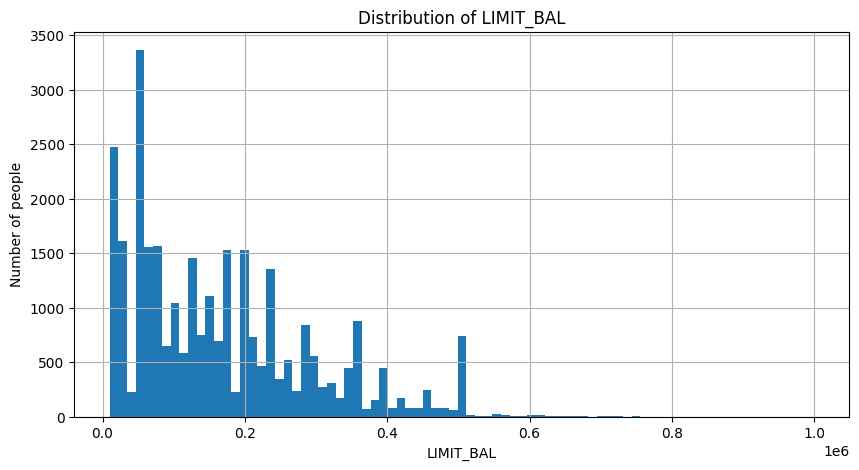

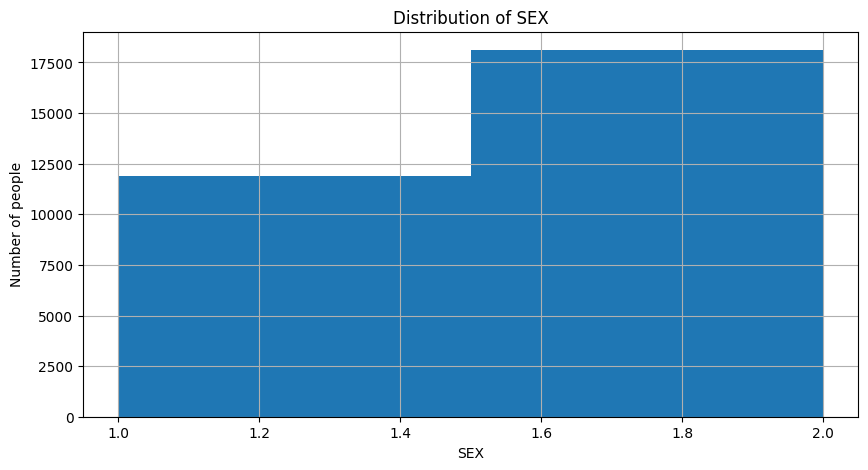

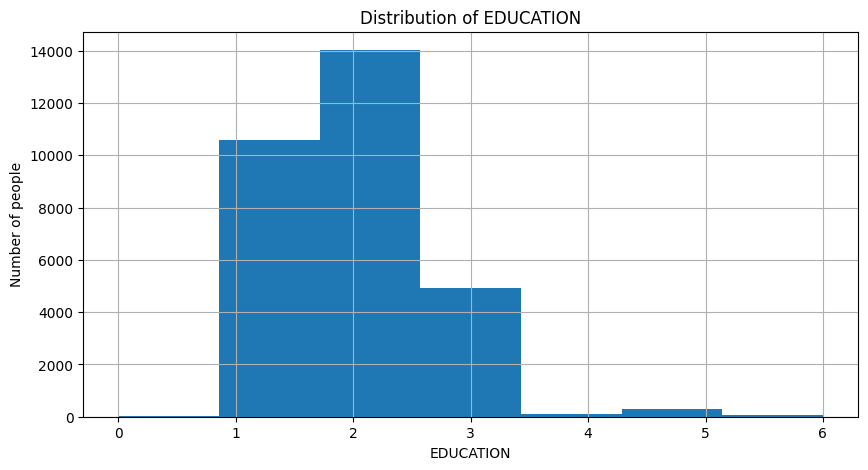

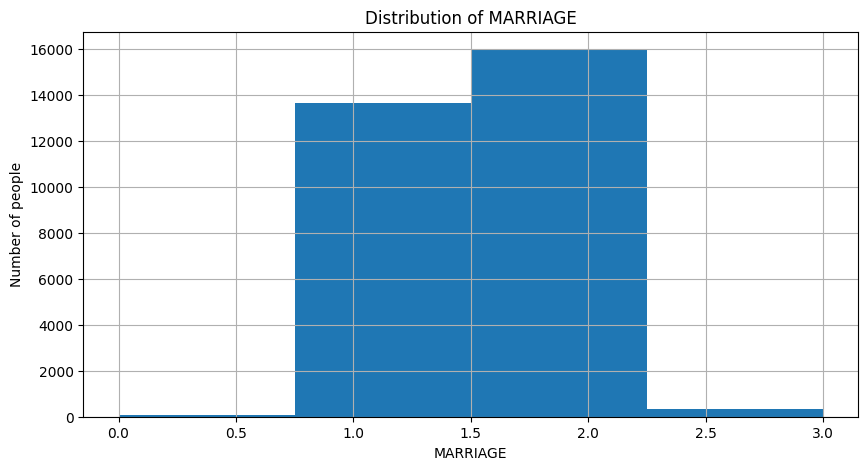

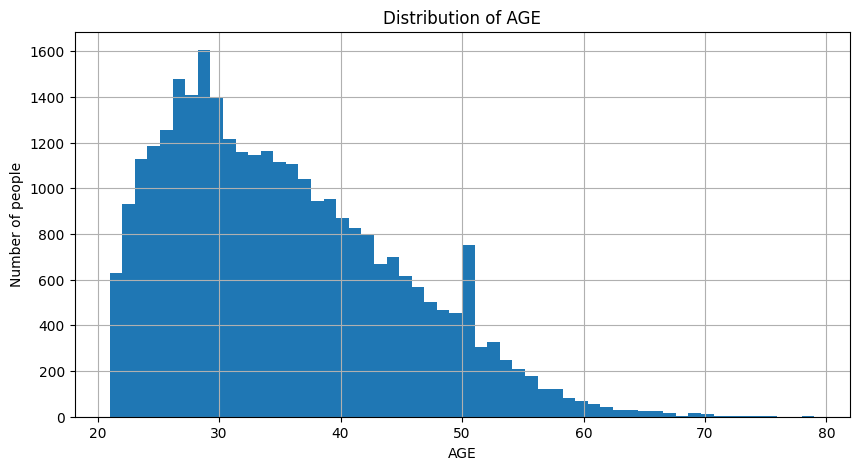

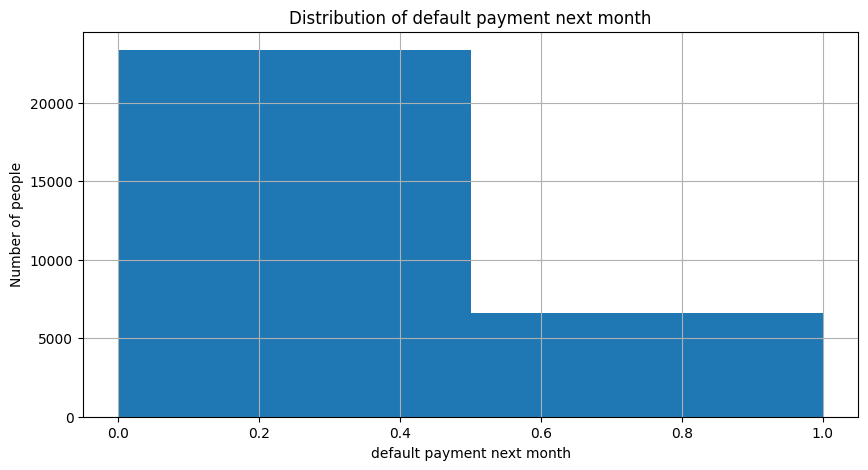

In [6]:
plot_distribution(raw_data, 'LIMIT_BAL') # limit_balance
plot_distribution(raw_data, 'SEX') # sex
plot_distribution(raw_data, 'EDUCATION') # Education
plot_distribution(raw_data, 'MARRIAGE') # Marriage
plot_distribution(raw_data, 'AGE') # Age
plot_distribution(raw_data, 'default payment next month') #default

There happens to be a few items that are not defined int he dataset and therefore will be removed.

In [7]:
data = raw_data[raw_data['MARRIAGE'] != 0]
data = data[data['EDUCATION'] < 4]
data = data[data['EDUCATION'] != 0]

# Reverse the order of the time series columns so that the months are in order...
data.iloc[:, 5:11] = data.iloc[:, 10:4:-1].values
data.iloc[:, 11:17] = data.iloc[:, 16:10:-1].values
data.iloc[:, 17:23] = data.iloc[:, 22:16:-1].values

In [8]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,-2,-2,-1,-1,2,...,689,3102,3913,0,0,0,0,689,0,1
2,120000,2,2,2,26,2,0,0,0,2,...,2682,1725,2682,2000,0,1000,1000,1000,0,1
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,0
4,50000,2,2,1,37,0,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,0
5,50000,1,2,1,57,0,0,0,-1,0,...,35835,5670,8617,679,689,9000,10000,36681,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,192815,188948,1000,5000,3047,5003,20000,8500,0
29997,150000,1,3,2,43,0,0,-1,-1,-1,...,3502,1828,1683,0,0,129,8998,3526,1837,0
29998,30000,1,2,2,37,0,0,-1,2,3,...,2758,3356,3565,3100,2000,4200,22000,0,0,1
29999,80000,1,3,1,41,-1,0,0,0,-1,...,76304,78379,-1645,1804,52964,1926,1178,3409,85900,1


NOTE: After removal, we see that we lost 522 points, a 0.01% loss of our data. This loss of information may help with fitting of our models since the data is more "correct" now. Distribution is not affected and therefore, the process remains valid

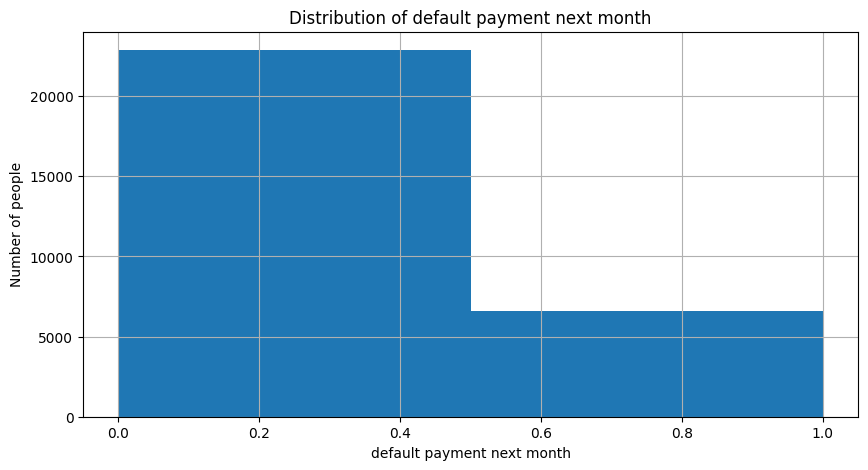

In [9]:
plot_distribution(data, 'default payment next month')

We can see that our data is imbalanced and has a skewed nature to it. We should try different methods to get a better representation to work on. However, for now let us work with the entire data frame to gain a reference.

Let us do simple preprocessing to get our split datasets ready.

In [10]:
from sklearn.model_selection import train_test_split

# Assuming raw_data is your DataFrame and `defalut payment next month` is the target variable
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

# Convert the frame to float32 to work with neural networks
X = X.astype('float32')
y = y.astype('float32')

# Split the data into training, validation, and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Split the training set into demographic and time series data
X_demographic_train = X_train[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_train = X_train.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
X_time_series_train = X_time_series_train.values.reshape(-1,3,6)



# Do the same for the validation set
X_demographic_val = X_val[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_val = X_val.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_val = X_time_series_val.values.reshape(-1,3,6)

# And the test set
X_demographic_test = X_test[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_test = X_test.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_test = X_time_series_test.values.reshape(-1, 3, 6)

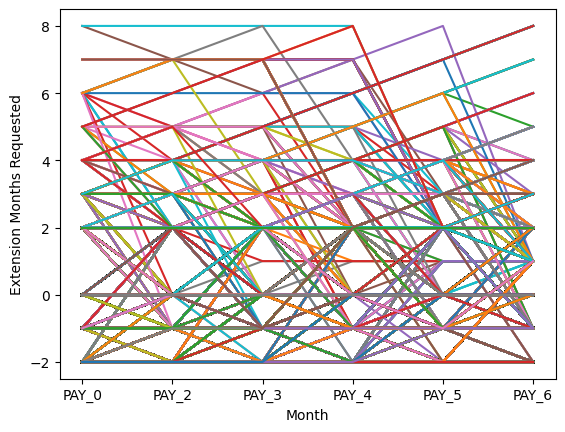

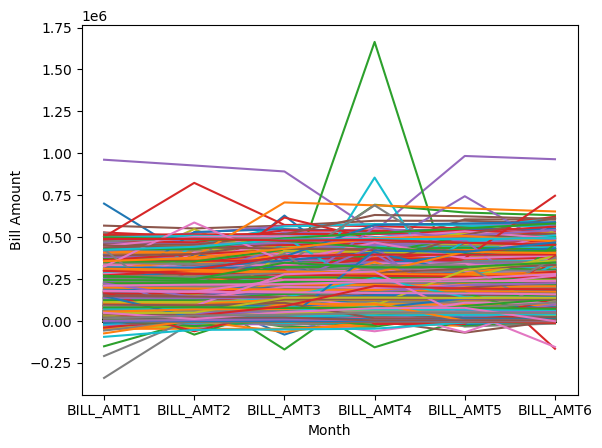

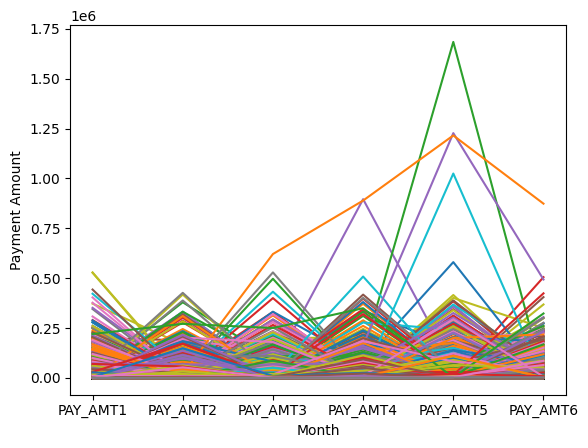

In [11]:
# Select columns 6-11 (Python uses 0-based indexing)
selected_columns = X.iloc[:, 5:11]

# Create a new figure
plt.figure()

# For each row (user) in the DataFrame, plot their data
for index, row in selected_columns.iterrows():
    plt.plot(row.index, row.values)

# Set the x and y axis labels
plt.xlabel('Month')
plt.ylabel('Extension Months Requested')

# Show the plot
plt.show()

# Select columns 12-17 and plot
selected_columns = X.iloc[:, 11:17]
plt.figure()
for index, row in selected_columns.iterrows():
    plt.plot(row.index, row.values)
plt.xlabel('Month')
plt.ylabel('Bill Amount')
plt.show()

# Select columns 18-23 and plot
selected_columns = X.iloc[:, 17:23]
plt.figure()
for index, row in selected_columns.iterrows():
    plt.plot(row.index, row.values)
plt.xlabel('Month')
plt.ylabel('Payment Amount')
plt.show()



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
import random as rn

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(0)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
rn.seed(0)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(0)

In [13]:
# Define the model: This will be LSTM using all data...
model = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model.add(LSTM(units=18, dropout=0.2, input_shape=(3,6)))

# Add Dense layer for demographic data
model.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.6385 - loss: 0.6317 - val_accuracy: 0.7700 - val_loss: 0.5386
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.7827 - loss: 0.5213 - val_accuracy: 0.7729 - val_loss: 0.5096
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.7886 - loss: 0.4787 - val_accuracy: 0.7893 - val_loss: 0.4748
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.7947 - loss: 0.4729 - val_accuracy: 0.7963 - val_loss: 0.4721
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.8033 - loss: 0.4595 - val_accuracy: 0.7982 - val_loss: 0.4682
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.8052 - loss: 0.4611 - val_accuracy: 0.7953 - val_loss: 0.4683
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8067 - loss: 0.4572 - val_accuracy: 0.7978 - val_loss: 0.4681
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.8107 - loss: 0.4558 - val_accurac

In [14]:
# Define the model: This will be RNN using all data...
model2 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model2.add(SimpleRNN(units=18, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for demographic data
model2.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model2.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.6686 - loss: 0.6671 - val_accuracy: 0.7746 - val_loss: 0.5482
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.7836 - loss: 0.5306 - val_accuracy: 0.7741 - val_loss: 0.5366
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.7845 - loss: 0.5246 - val_accuracy: 0.7743 - val_loss: 0.5364
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7848 - loss: 0.5228 - val_accuracy: 0.7746 - val_loss: 0.5343
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.7849 - loss: 0.5202 - val_accuracy: 0.7746 - val_loss: 0.5332
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.7844 - loss: 0.5212 - val_accuracy: 0.7744 - val_loss: 0.5322
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7849 - loss: 0.5189 - val_accuracy: 0.7749 - val_loss: 0.5317
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.7853 - loss: 0.5198 - val_accurac

In [15]:
# Define the model: This will be LSTM using time-series only...
model3 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model3.add(LSTM(units=18, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model3.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.5154 - loss: 0.7476 - val_accuracy: 0.7576 - val_loss: 0.5343
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.7706 - loss: 0.5153 - val_accuracy: 0.7749 - val_loss: 0.4873
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.7884 - loss: 0.4724 - val_accuracy: 0.7846 - val_loss: 0.4749
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8008 - loss: 0.4608 - val_accuracy: 0.7966 - val_loss: 0.4710
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8064 - loss: 0.4569 - val_accuracy: 0.7994 - val_loss: 0.4702
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.8091 - loss: 0.4572 - val_accuracy: 0.7949 - val_loss: 0.4706
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.8140 - loss: 0.4534 - val_accuracy: 0.7999 - val_loss: 0.4664
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8136 - loss: 0.4506 - val_accurac

In [16]:
# Define the model: This will be RNN using time-series only...
model4 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model4.add(SimpleRNN(units=18, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model4.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.7652 - loss: 0.5585 - val_accuracy: 0.7734 - val_loss: 0.5522
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.7836 - loss: 0.5319 - val_accuracy: 0.7737 - val_loss: 0.5429
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.7852 - loss: 0.5298 - val_accuracy: 0.7741 - val_loss: 0.5407
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.7859 - loss: 0.5212 - val_accuracy: 0.7741 - val_loss: 0.5390
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.7860 - loss: 0.5238 - val_accuracy: 0.7743 - val_loss: 0.5368
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.7849 - loss: 0.5209 - val_accuracy: 0.7743 - val_loss: 0.5360
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.7859 - loss: 0.5218 - val_accuracy: 0.7743 - val_loss: 0.5349
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.7860 - loss: 0.5204 - 

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score #will be used to printInfo of models

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def printInfo(model, inputs):
    # Use the model to make predictions
    y_pred_prob = model.predict(inputs)

    # Apply a threshold to get strict 0 or 1 values
    y_pred = (y_pred_prob >= 0.5).astype(int)

    # Now compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = np.mean([cm[i,i]/(np.sum(cm[:,i])) for i in range(cm.shape[0])])

    # Print the metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")

    # Draw the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
Accuracy: 0.8146200814111262
Precision: 0.626410835214447
Recall: 0.4214123006833713
Specificity: 0.7371575134156068


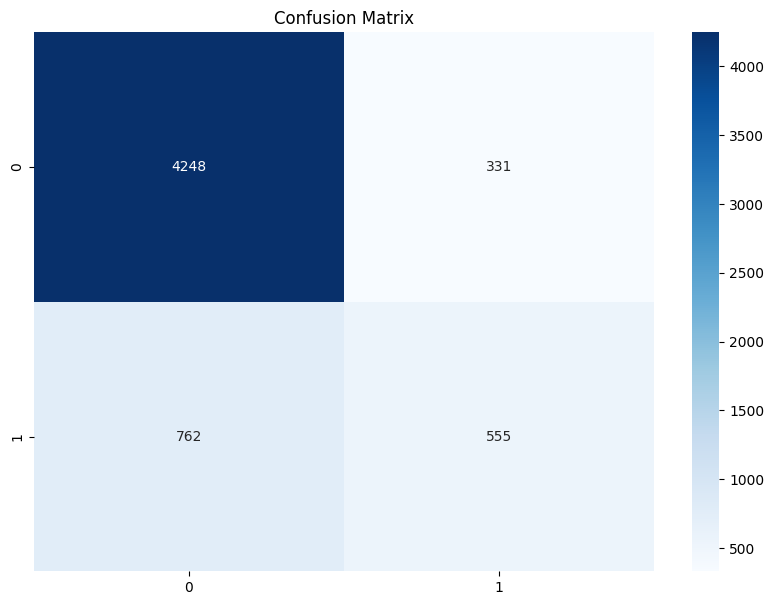

In [19]:
printInfo(model, [X_time_series_test, X_demographic_test])

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
Accuracy: 0.778663500678426
Precision: 0.7307692307692307
Recall: 0.01442672741078208
Specificity: 0.754822434805399


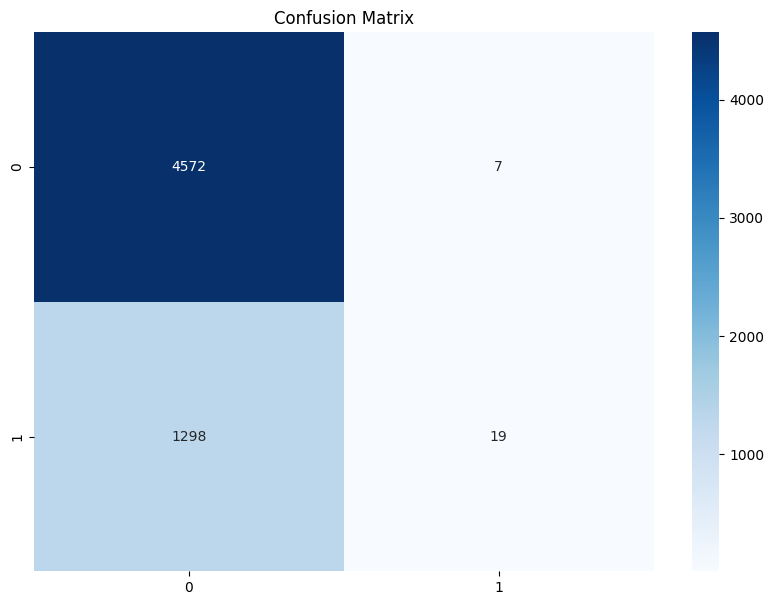

In [20]:
printInfo(model2, [X_time_series_test, X_demographic_test])

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
Accuracy: 0.816146540027137
Precision: 0.6593707250341997
Recall: 0.3659832953682612
Specificity: 0.748852835895609


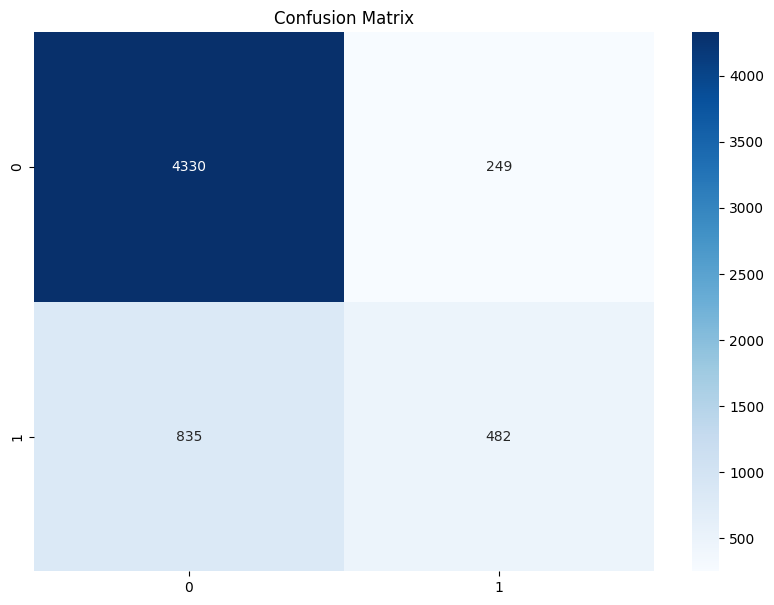

In [21]:
printInfo(model3, X_time_series_test)

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
Accuracy: 0.7788331071913162
Precision: 0.6857142857142857
Recall: 0.018223234624145785
Specificity: 0.7325517342238038


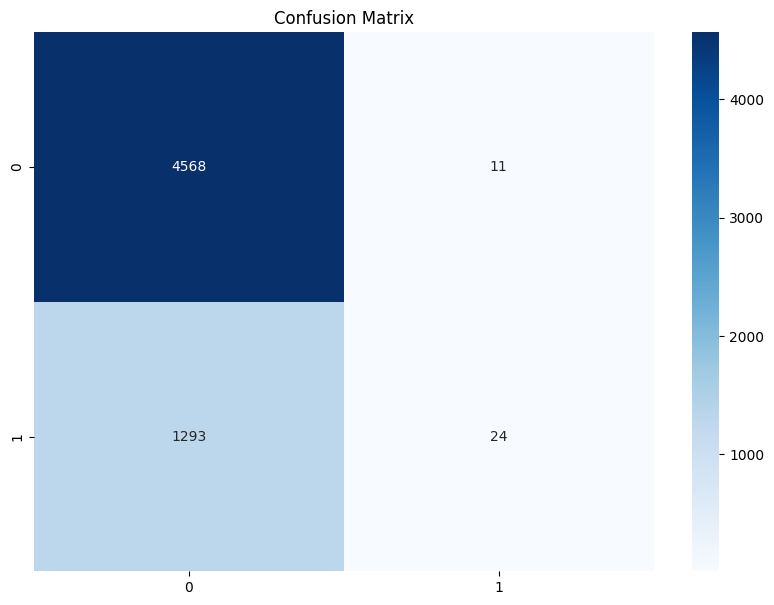

In [22]:
printInfo(model4, X_time_series_test)

# Let us try to get a good model based on relevent data only (i.e only time series)

Let us try to make the model more "focused" Lets have layers that look at the one-to-one relation prior to applying a relation overall datapoints.

In [23]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras_self_attention import SeqWeightedAttention

# Define the model
attentionLSTM = Sequential()

# Add first LSTM layer with return_sequences=True
attentionLSTM.add(LSTM(units=18, dropout=0.2, return_sequences=True, input_shape=(3, 6)))

# Add second LSTM layer
attentionLSTM.add(LSTM(units=9, return_sequences=True))

# Add attention layer
attentionLSTM.add(SeqWeightedAttention())

# Add Dropout layer
attentionLSTM.add(Dropout(0.1))

# Add Dense layer for binary classification
attentionLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
attentionLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
attentionLSTM.fit(X_time_series_train, y_train, validation_data=(X_time_series_val, y_val), batch_size=32, epochs=10)


Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7708 - loss: 0.5626 - val_accuracy: 0.7968 - val_loss: 0.4704
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8087 - loss: 0.4550 - val_accuracy: 0.8000 - val_loss: 0.4615
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8127 - loss: 0.4485 - val_accuracy: 0.8022 - val_loss: 0.4597
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8125 - loss: 0.4497 - val_accuracy: 0.8029 - val_loss: 0.4584
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8169 - loss: 0.4457 - val_accuracy: 0.8016 - val_loss: 0.4579
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8196 - loss: 0.4452 - val_accuracy: 0.8017 - val_loss: 0.4584
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8178 - loss: 0.4460 - val_accuracy: 0.8078 - val_loss: 0.4576
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8185 - loss: 0.4436 - val_accuracy: 0.8070 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
Accuracy: 0.8253052917232022
Precision: 0.6791510611735331
Recall: 0.41305998481397116
Specificity: 0.7637168456014869


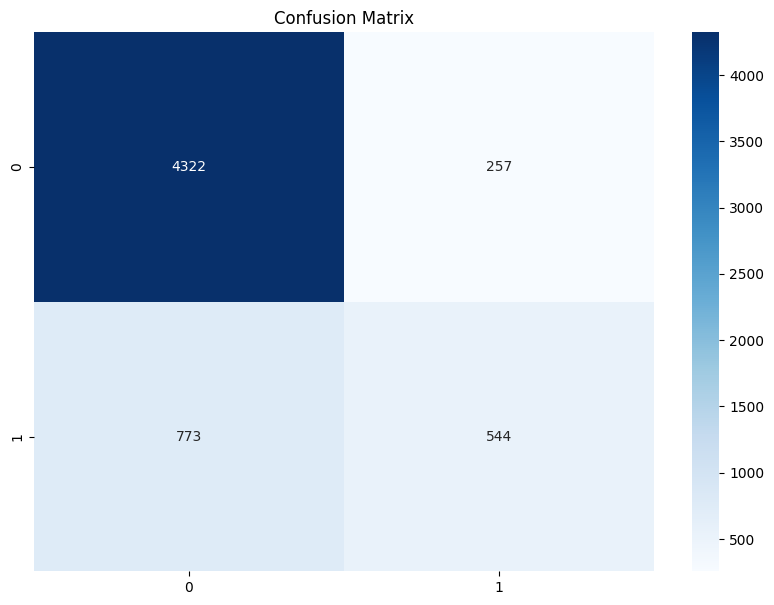

In [24]:
printInfo(attentionLSTM, X_time_series_test)

Lets try some further preprocessing to potentially improve our results...

In [25]:
from sklearn.preprocessing import StandardScaler


# standardize the features
scaler = StandardScaler()
#keep the same splits we had and just apply the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, index=X_val.index, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


Note: we have X_resampled and y_resampled and we need to split these into train/test sets again....

This time around however, we will only extract the time series data

In [26]:
# Split away the time series data again...
X_time_series_train_scaled = X_train_scaled.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
X_time_series_train_scaled = X_time_series_train_scaled.values.reshape(-1,3,6)

# Do the same for the validation set
X_time_series_val_scaled = X_val.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_val_scaled = X_time_series_val_scaled.values.reshape(-1,3,6)

# And the test set
X_time_series_test_scaled = X_test_scaled.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_test_scaled = X_time_series_test_scaled.values.reshape(-1,3,6)


In [27]:
#REPEAT OUR STRUCUTRE OF BEST MODEL SO FAR ON THIS NEW DATASET
# Define the model
attentionLSTM_s = Sequential()

# Add first LSTM layer with return_sequences=True
attentionLSTM_s.add(LSTM(units=18, dropout=0.2, return_sequences=True, input_shape=(3,6)))

# Add second LSTM layer
attentionLSTM_s.add(LSTM(units=9, dropout=0.2, return_sequences=True))

# Add attention layer
attentionLSTM_s.add(SeqWeightedAttention())

# Add Dropout layer
attentionLSTM_s.add(Dropout(0.1))

# Add Dense layer for binary classification
attentionLSTM_s.add(Dense(1, activation='sigmoid'))

# Compile the model
attentionLSTM_s.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
attentionLSTM_s.fit(X_time_series_train_scaled, y_train, validation_data=(X_time_series_val_scaled, y_val), batch_size=32, epochs=10)


Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7745 - loss: 0.5684 - val_accuracy: 0.7975 - val_loss: 0.5173
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8154 - loss: 0.4538 - val_accuracy: 0.7963 - val_loss: 0.4819
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8152 - loss: 0.4492 - val_accuracy: 0.7983 - val_loss: 0.4766
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8162 - loss: 0.4486 - val_accuracy: 0.7963 - val_loss: 0.4786
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8140 - loss: 0.4485 - val_accuracy: 0.7938 - val_loss: 0.4792
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8162 - loss: 0.4448 - val_accuracy: 0.7939 - val_loss: 0.4776
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8175 - loss: 0.4450 - val_accuracy: 0.7951 - val_loss: 0.4759
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8175 - loss: 0.4460 - val_accuracy: 0.7977 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8227611940298507
Precision: 0.669576059850374
Recall: 0.40774487471526194
Specificity: 0.7582273703256581


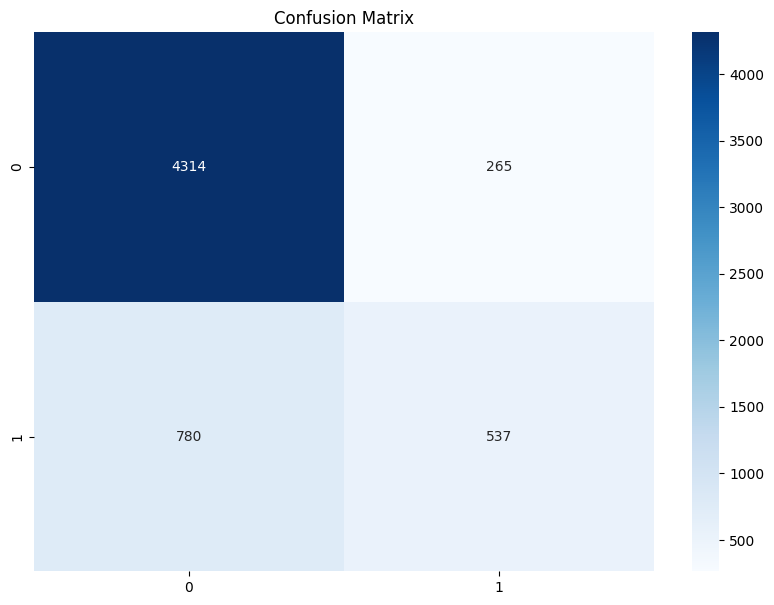

In [28]:
printInfo(attentionLSTM_s, X_time_series_test_scaled)

In [29]:
# Define the model: This will be LSTM using time-series only...
model5 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model5.add(LSTM(units=18, dropout=0.2, input_shape=(3, 6),return_sequences=True))

# Adjust the units and dropout according to your data
model5.add(LSTM(units=9, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
model5.add(Dense(1, activation='sigmoid'))

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model5.fit([X_time_series_train_scaled], y_train, validation_data=([X_time_series_val_scaled], y_val), batch_size=32, epochs=10)

Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7687 - loss: 0.5613 - val_accuracy: 0.7690 - val_loss: 0.5246
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8113 - loss: 0.4535 - val_accuracy: 0.7698 - val_loss: 0.5241
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8155 - loss: 0.4469 - val_accuracy: 0.7792 - val_loss: 0.4900
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8170 - loss: 0.4430 - val_accuracy: 0.7675 - val_loss: 0.5048
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8175 - loss: 0.4440 - val_accuracy: 0.7687 - val_loss: 0.4989
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8185 - loss: 0.4441 - val_accuracy: 0.7629 - val_loss: 0.5059
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8177 - loss: 0.4416 - val_accuracy: 0.7707 - val_loss: 0.4972
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8191 - loss: 0.4409 - val_accuracy: 0.7765 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
Accuracy: 0.82140434192673
Precision: 0.6859154929577465
Recall: 0.3697798025816249
Specificity: 0.7629346072578937


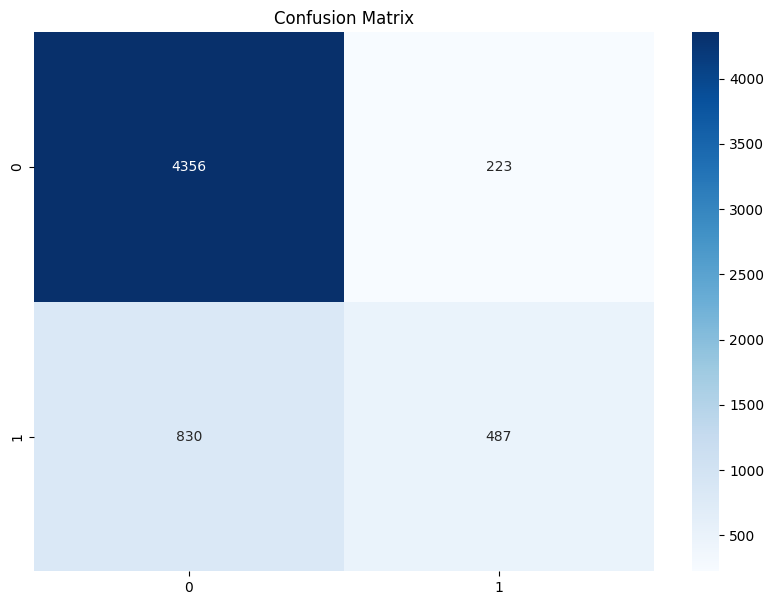

In [30]:
printInfo(model5, X_time_series_test_scaled)

In [31]:
from keras.layers import Bidirectional

# Define the model: This will be LSTM using time-series only...
model6 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model6.add(Bidirectional(LSTM(units=18, dropout=0.15, input_shape=(3, 6),return_sequences= True)))

# Add attention layer
model6.add(SeqWeightedAttention())

# Add Dropout layer
model6.add(Dropout(0.1))

# Add Dense layer for binary classification
model6.add(Dense(1, activation='sigmoid'))

# Compile the model
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model6.fit(X_time_series_train_scaled, y_train, validation_data=([X_time_series_val_scaled], y_val), batch_size=32, epochs=10)

Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7613 - loss: 0.5486 - val_accuracy: 0.7878 - val_loss: 0.4877
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8151 - loss: 0.4465 - val_accuracy: 0.7877 - val_loss: 0.4873
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8193 - loss: 0.4395 - val_accuracy: 0.7731 - val_loss: 0.4968
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8172 - loss: 0.4408 - val_accuracy: 0.7754 - val_loss: 0.4984
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8207 - loss: 0.4360 - val_accuracy: 0.7770 - val_loss: 0.4942
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8227 - loss: 0.4362 - val_accuracy: 0.7748 - val_loss: 0.5053
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.8202 - loss: 0.4361 - val_accuracy: 0.7790 - val_loss: 0.4929
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8231 - loss: 0.4349 - val_accuracy: 0.7719 - v

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8251356852103121
Precision: 0.67875
Recall: 0.4123006833712984
Specificity: 0.7634330847723705


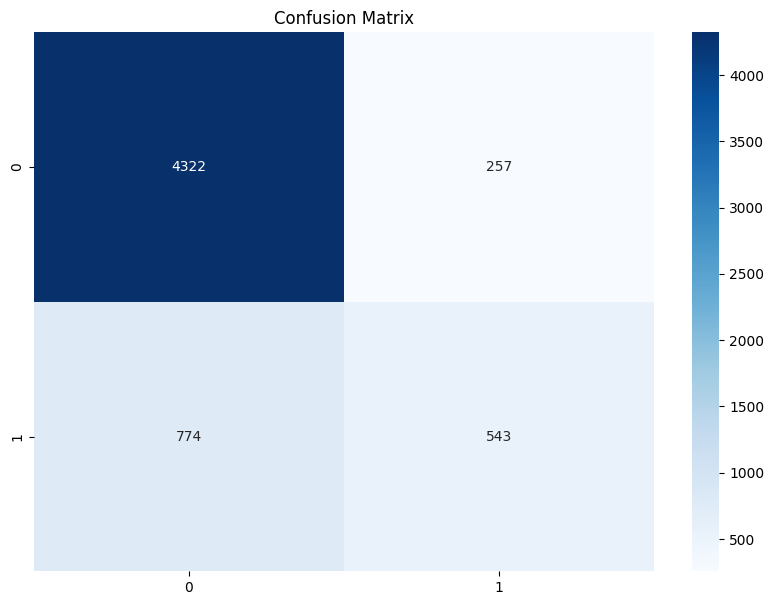

In [32]:
printInfo(model6, X_time_series_test_scaled)

# Dealing with Imbalance.

In [33]:
from imblearn.under_sampling import RandomUnderSampler

In [34]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

# Fit and resample the data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1), y_train)

<Axes: >

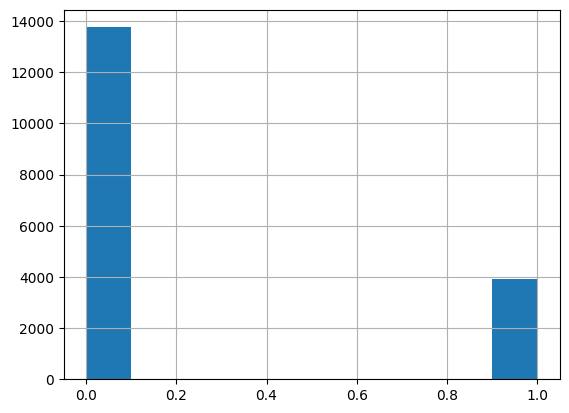

In [35]:
y_train.hist()

<Axes: >

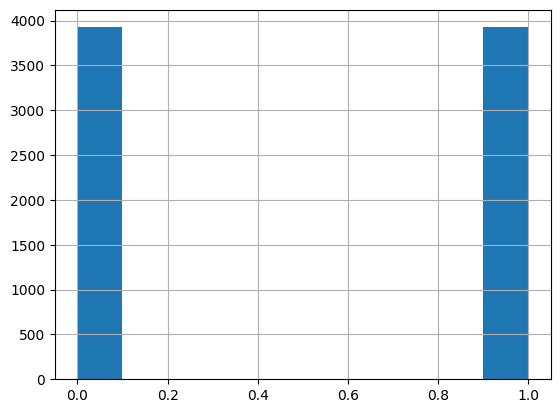

In [36]:
y_train_resampled.hist()

In [37]:
# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
# Convert the DataFrame to a NumPy array
X_train_resampled_array = X_train_resampled.values

# Now reshape it
X_time_series_train_scaled = X_train_resampled_array.reshape(-1,3,6)

In [38]:
#REPEAT OUR STRUCUTRE OF BEST MODEL SO FAR ON THIS NEW DATASET
# Define the model
attentionLSTM_s_b_u = Sequential()

# Add first LSTM layer with return_sequences=True
attentionLSTM_s_b_u.add(LSTM(units=18, dropout=0.2, return_sequences=True, input_shape=(3,6)))

# Add second LSTM layer
attentionLSTM_s_b_u.add(LSTM(units=9, return_sequences=True))

# Add second LSTM layer
attentionLSTM_s_b_u.add(LSTM(units=4))


# Add Dense layer for binary classification
attentionLSTM_s_b_u.add(Dense(1, activation='sigmoid'))

# Compile the model
attentionLSTM_s_b_u.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
attentionLSTM_s_b_u.fit(X_time_series_train_scaled, y_train_resampled, validation_data=(X_time_series_val_scaled, y_val), batch_size=32, epochs=10)


Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5301 - loss: 0.6827 - val_accuracy: 0.3645 - val_loss: 0.7387
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6553 - loss: 0.6173 - val_accuracy: 0.7291 - val_loss: 0.6149
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.6039 - val_accuracy: 0.7156 - val_loss: 0.6232
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - loss: 0.6004 - val_accuracy: 0.7154 - val_loss: 0.6161
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - loss: 0.6034 - val_accuracy: 0.6935 - val_loss: 0.6347
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6832 - loss: 0.5972 - val_accuracy: 0.6818 - val_loss: 0.6383
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6838 - loss: 0.5963 - val_accuracy: 0.6786 - val_loss: 0.6382
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6820 - loss: 0.5977 - val_accuracy: 0.6849 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.7871438263229308
Precision: 0.522962962962963
Recall: 0.5360668185269551
Specificity: 0.6942795457137736


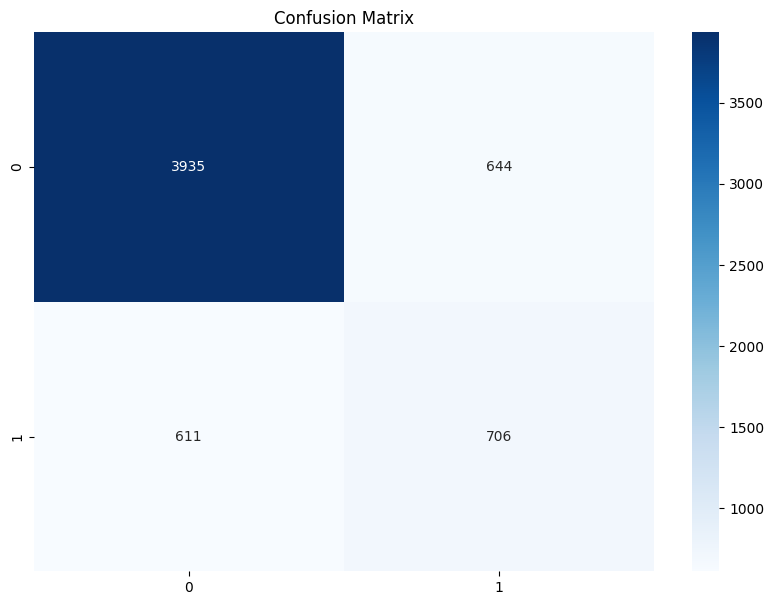

In [39]:
printInfo(attentionLSTM_s_b_u, X_time_series_test_scaled)